<a href="https://colab.research.google.com/github/Md-Abu-Sadik/PDS_Project_07/blob/main/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()
print(uploaded)

Saving kaggle.json to kaggle.json
{'kaggle.json': b'{"username":"mdabusadiksadee","key":"41143ac3d7655858cba8cfada2fc220b"}'}


In [36]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [8]:
!kaggle datasets download -d hellbuoy/car-price-prediction

Dataset URL: https://www.kaggle.com/datasets/hellbuoy/car-price-prediction
License(s): unknown
  0% 0.00/18.1k [00:00<?, ?B/s]
100% 18.1k/18.1k [00:00<00:00, 30.8MB/s]


In [9]:
import zipfile
with zipfile.ZipFile('car-price-prediction.zip', 'r') as zip_ref:
    zip_ref.extractall('data_folder')

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [73]:
df = pd.read_csv("data_folder/CarPrice_Assignment.csv")
df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [40]:
df.isnull().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


In [41]:
cat_cols = df.select_dtypes("O").columns

In [42]:
for col in cat_cols:
    print(df[col].value_counts())
    print("======================")

CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64
fueltype
gas       185
diesel     20
Name: count, dtype: int64
aspiration
std      168
turbo     37
Name: count, dtype: int64
doornumber
four    115
two      90
Name: count, dtype: int64
carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64
drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64
enginelocation
front    202
rear       3
Name: count, dtype: int64
enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64
cylindernumber
four      159
six        24
five       11
eight       5
two         4
three 

In [43]:
from sklearn.model_selection import train_test_split
X = df.drop("price",axis = 1)
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [58]:
from sklearn.model_selection import KFold
import pandas as pd
def k_fold_target_encoding(train_data, test_data, cat_columns, target, n_folds=5):
    train_data = train_data.copy()
    test_data = test_data.copy()
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    for col in cat_columns:
        train_encoded = pd.Series(index=train_data.index, dtype=float)
        for train_idx, val_idx in kf.split(train_data):
            train_fold, val_fold = train_data.iloc[train_idx], train_data.iloc[val_idx]
            mean_target = train_fold.groupby(col)[target].mean()
            train_encoded.iloc[val_idx] = val_fold[col].map(mean_target)
        train_data[col + '_encoded'] = train_encoded.fillna(train_data[target].mean())
        full_train_mean = train_data.groupby(col)[target].mean()
        test_data[col + '_encoded'] = test_data[col].map(full_train_mean).fillna(train_data[target].mean())
    return train_data, test_data
train_data, test_data = k_fold_target_encoding(df.iloc[X_train.index], df.iloc[X_test.index], cat_columns=cat_cols, target='price')

In [45]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153 entries, 90 to 102
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   car_ID                  153 non-null    int64  
 1   symboling               153 non-null    int64  
 2   CarName                 153 non-null    object 
 3   fueltype                153 non-null    object 
 4   aspiration              153 non-null    object 
 5   doornumber              153 non-null    object 
 6   carbody                 153 non-null    object 
 7   drivewheel              153 non-null    object 
 8   enginelocation          153 non-null    object 
 9   wheelbase               153 non-null    float64
 10  carlength               153 non-null    float64
 11  carwidth                153 non-null    float64
 12  carheight               153 non-null    float64
 13  curbweight              153 non-null    int64  
 14  enginetype              153 non-null    object

In [46]:
train_data = train_data.drop(cat_cols, axis = 1)
test_data = test_data.drop(cat_cols,axis = 1)

X_train = train_data.drop(columns = ["price","car_ID"], axis = 1)

In [47]:
X_test = test_data.drop(columns = ["price","car_ID"], axis = 1)

In [48]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153 entries, 90 to 102
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   car_ID                  153 non-null    int64  
 1   symboling               153 non-null    int64  
 2   wheelbase               153 non-null    float64
 3   carlength               153 non-null    float64
 4   carwidth                153 non-null    float64
 5   carheight               153 non-null    float64
 6   curbweight              153 non-null    int64  
 7   enginesize              153 non-null    int64  
 8   boreratio               153 non-null    float64
 9   stroke                  153 non-null    float64
 10  compressionratio        153 non-null    float64
 11  horsepower              153 non-null    int64  
 12  peakrpm                 153 non-null    int64  
 13  citympg                 153 non-null    int64  
 14  highwaympg              153 non-null    int64 

In [49]:
from xgboost import XGBRegressor

In [50]:
xgb = XGBRegressor(random_state = 42)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def model_stats(model = xgb, X_test = X_test, y_test = y_test):
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared (R2):", r2)

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01,0.1],
    'max_depth': [5, 7],
    'colsample_bytree': [0.8, 1.0],
}

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = -grid_search.best_score_
print("Best Parameters:", best_params)
print("Best RMSE Score:", best_score)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best RMSE Score: 2663.2298314567843


In [53]:
xgb_tuned = XGBRegressor(colsample_bytree= 0.8, learning_rate= 0.1, max_depth= 5, n_estimators = 100)
xgb_tuned.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [54]:
model_stats(model = xgb)

Mean Squared Error (MSE): 6070784.33722204
Root Mean Squared Error (RMSE): 2463.896170138271
Mean Absolute Error (MAE): 1599.7511454326923
R-squared (R2): 0.910274521271715


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [55]:
model_stats(model = xgb_tuned)

Mean Squared Error (MSE): 6211798.673122346
Root Mean Squared Error (RMSE): 2492.348024077365
Mean Absolute Error (MAE): 1627.9331147085336
R-squared (R2): 0.9081903459669478


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [56]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [57]:
model_stats(model = lin_reg)

Mean Squared Error (MSE): 9284054.436379153
Root Mean Squared Error (RMSE): 3046.974636648483
Mean Absolute Error (MAE): 1941.79641743262
R-squared (R2): 0.8627827670081982


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [31]:
df = df.dropna()

In [32]:
df = pd.get_dummies(df, drop_first=True)

In [33]:
if "price" not in df.columns:
    raise ValueError("The 'price' column is missing. Replace 'price' with the actual target column name.")

X = df.drop("price", axis=1)
y = df["price"]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
df = pd.read_csv("/content/data_folder/CarPrice_Assignment.csv")

In [11]:
print(df.head())
print(df.info())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [12]:
df = df.dropna()

In [13]:
df = pd.get_dummies(df, drop_first=True)

In [14]:
X = df.drop("price", axis=1)
y = df["price"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
model = LinearRegression()

In [17]:
model.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = model.predict(X_test)

In [72]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df = pd.read_csv("/content/data_folder/CarPrice_Assignment.csv")

print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Information:")
print(df.info())

print("\nDataset Description:")
print(df.describe())

df = df.dropna()

df = pd.get_dummies(df, drop_first=True)

if "price" not in df.columns:
    raise ValueError("The 'price' column is missing. Replace 'price' with the actual target column name.")

X = df.drop("price", axis=1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

print("\nExample Prediction:")
sample_features = X_test.iloc[0].values.reshape(1, -1)
predicted_price = model.predict(sample_features)[0]
actual_price = y_test.iloc[0]

print(f"Predicted Price: {predicted_price:.2f}")
print(f"Actual Price: {actual_price:.2f}")


First 5 rows of the dataset:
   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio h

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    confusion_matrix,
    accuracy_score,
    precision_score
)
import matplotlib.pyplot as plt


In [77]:
# Load the dataset
df = pd.read_csv("/content/data_folder/CarPrice_Assignment.csv")

# Quick overview of the dataset
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Information:")
print(df.info())
print("\nDataset Description:")
print(df.describe())

# Check for missing values
print("\nMissing Values in Dataset:")
print(df.isnull().sum())


First 5 rows of the dataset:
   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio h

In [78]:
# Drop rows with missing values
df = df.dropna()


In [79]:
# Convert categorical variables into numeric with one-hot encoding
df = pd.get_dummies(df, drop_first=True)


In [80]:
# Drop any unnecessary columns (e.g., IDs or irrelevant data)
df = df.drop(columns=["car_ID"], axis=1)


In [81]:
# Remove extreme values in the target column
q99 = df['price'].quantile(0.99)
df = df[df['price'] < q99]


In [82]:
# Split data into features (X) and target variable (y)
X = df.drop("price", axis=1)
y = df["price"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [83]:
# Scale features to normalize their range
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [84]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [85]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model using regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")



Model Evaluation:
Mean Squared Error (MSE): 863793696724402826756754983878656.00
Mean Absolute Error (MAE): 16222774649071522.00
R² Score: -10221384660667803528855552.00


In [86]:
# Make a single prediction for demonstration
sample_features = X_test[0].reshape(1, -1)  # Use the first test data point
predicted_price = model.predict(sample_features)[0]
actual_price = y_test.iloc[0]

print("\nExample Prediction:")
print(f"Predicted Price: {predicted_price:.2f}")
print(f"Actual Price: {actual_price:.2f}")



Example Prediction:
Predicted Price: 47708300837054304.00
Actual Price: 8249.00


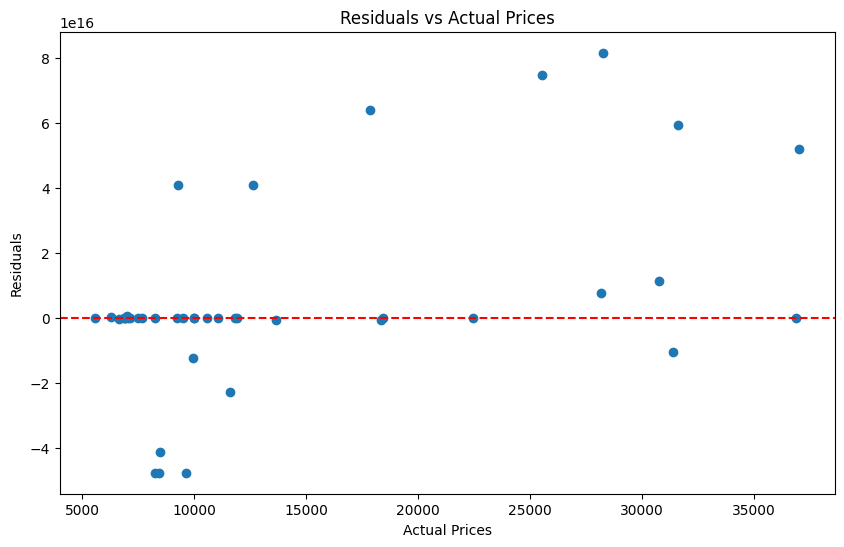

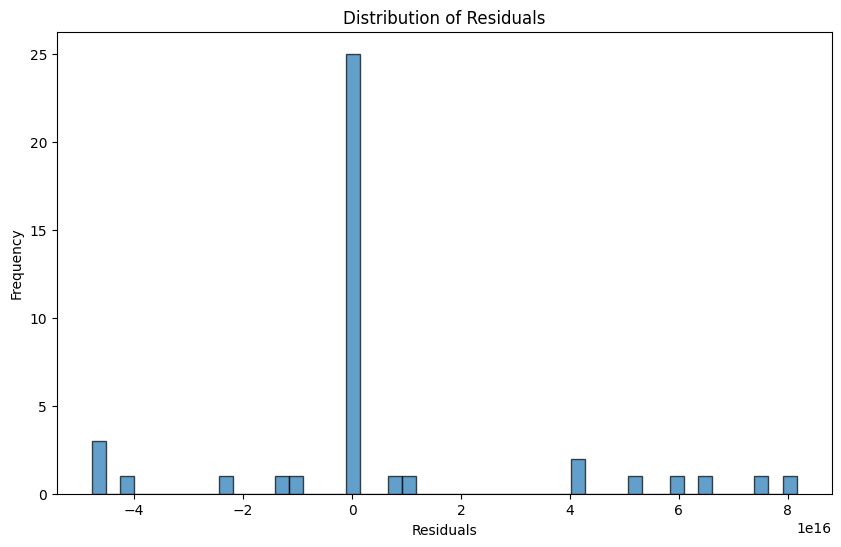

In [88]:
# Step 15: Plotting Residuals (Visualize Model Performance)
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.figure(figsize=(10,6))
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residuals vs Actual Prices")
plt.show()

# Step 16: Residual Distribution (Optional)
plt.figure(figsize=(10,6))
plt.hist(residuals, bins=50, edgecolor='k', alpha=0.7)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()


In [89]:
# Evaluate the final linear regression model
print("\nLinear Regression Model Final Evaluation:")
model_stats(model=model, X_test=X_test, y_test=y_test)



Linear Regression Model Final Evaluation:
Mean Squared Error (MSE): 8.637936967244028e+32
Root Mean Squared Error (RMSE): 2.939036741390626e+16
Mean Absolute Error (MAE): 1.6222774649071522e+16
R-squared (R2): -1.0221384660667804e+25


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
